# Plotting a Single Sweep of Data

In this section, we will show how we can access raw electrophysiology recordings from the Allen Institute SDK. Once downloaded, we will be able to plot our cells' electrophysiology features to compare characteristics across specimens. We will also learn how to download electrophysiology traces of single cells and plot single sweeps of these cells. 

In [1]:
# This will ensure that the AllenSDK is installed.
# If not, it will install it for you.
try:
    import allensdk
    if allensdk.__version__ == '2.11.2':
        print('allensdk already installed.')
    else: 
        print('incompatible version of allensdk installed')
except ImportError as e:
    !pip install allensdk

allensdk already installed.


In [2]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# Import Toolkits 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('Packages were successfully imported.')

Packages were successfully imported.


## Downloading Ephys Metadata

We will start by downloading the metadata for our cells once again. If you are still having trouble with `get_cells()` look through <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.cell_types_cache.html">the documentation for the CellTypesCache</a> for more information.

In [4]:
# Redownload the metadata for all our cells
all_cells = ctc.get_cells()
all_cells_df = pd.DataFrame(all_cells).set_index('id')
all_cells_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN


At this point, you might have realized that this dataframe doesn't contain any data about the electrophysiology of our cells either. In order to get information about the electrophysiological properties of these cells, we need to use the `get_ephys_features()` method on our instance of the cell types cache.

Just as we did before with morphology, we will will assign the output of `get_ephys_features()` and store it as a Pandas dataframe.

In [5]:
# Download electrophysiology data 
ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
ephys_features.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991


Again, we can combine our dataframe that contians the metadata of our cells with our electrophysiology dataframe to create one single dataframe.

In [6]:
# Combine our metadata with our electrophysiology data 
all_ephys_features = all_cells_df.join(ephys_features)
all_ephys_features.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,...,14.738000,1.391268,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,11.763808,1.290815,-55.875000,-52.515627,-69.109379,1.162618,1.197155,1.369171,-80.156250,-72.042976
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,...,8.432940,1.315510,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036


## Downloading  and Plotting Sweep Data

The `get_ephys_data()` method can download electrophysiology traces for a single cell in the database. This method returns a class instance with helper methods for retrieving stimulus and response traces out of an NWB file. In order to use this method, you must specify the id of the cell specimen whose electrophysiology you would like to download.

Below we go over methods that can be used to access the electrophysiology data for single cells, the source documentation for all the methods we cover can be found on the <a href = 'https://allensdk.readthedocs.io/en/latest/allensdk.core.nwb_data_set.html'> Allen Brain Atlas website</a>.


The `get_experiment_sweep_numbers()` method returns all of the sweep numbers for experiments in the file. Each sweep contains metadata and electrophysiology data.

In [15]:
# Select cell id 
cell_id_2 = 525011903

# Get electrophysiological traces of our cell
specimen_ephys_data = ctc.get_ephys_data(specimen_id = cell_id_2)

# Retrieve sweep numbers for cell
sweep_numbers = specimen_ephys_data.get_experiment_sweep_numbers()
print(sweep_numbers)

[10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 115, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 62, 63, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


Now that we have sweep numbers to choose from, we can take a look at a sweep's metadata by calling `get_sweep_metadata()`. This returns a dictionary containing information such as stimulus paramaters and recording quality. 

In [28]:
# Select a sweep number 
sweep_number = 69

# Retrieve metadata for selected sweep
specimen_metadata = specimen_ephys_data.get_sweep_metadata(sweep_number)
print(specimen_metadata)

{'aibs_stimulus_amplitude_pa': 139.999997705864, 'aibs_stimulus_name': 'Square - 2s Suprathreshold', 'initial_access_resistance': 12.931512, 'seal': 1.125671168}


The `get_sweep()` returns a dictionary containing the stimulus, response, index_range, and sampling rate for a particular sweep.

In [29]:
sweep_data = specimen_ephys_data.get_sweep(sweep_number)
print(sweep_data)

{'stimulus': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'response': array([-0.07012501, -0.07012501, -0.07009375, ..., -0.07      ,
       -0.07      , -0.06996875], dtype=float32), 'stimulus_unit': 'Amps', 'index_range': (37500, 500999), 'sampling_rate': 50000.0}


Now that you've pulled down some data, chosen a cell, and chosen a sweep number, let's plot that data. We can look closer at the action potential by plotting the raw recording. Our `sweep_data` variable has all the data we need to plot our sweep; the stimulus current injected into our cell, the cell's response, and sampling rate of the sweep. 

**Note**: Without changing the limits on the x-axis, you won't be able to see individual action potentials. To modify the x-axis using `plt.xlim([min,max])` to specify the limits (replace min and max with numbers that make sense for this x-axis)

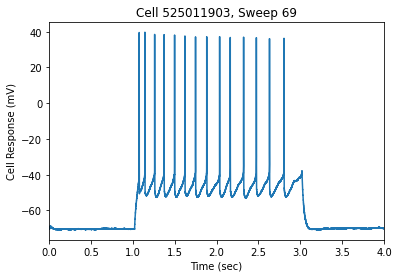

In [25]:
# Get the stimulus trace (in amps) and convert to pA
stim_current = sweep_data['stimulus'] * 1e12

# Get the voltage trace (in volts) and convert to mV
response_voltage = sweep_data['response'] * 1e3

# Get the sampling rate and can create a time axis for our data
sampling_rate = sweep_data['sampling_rate'] # in Hz
timestamps = (np.arange(0, len(response_voltage)) * (1.0 / sampling_rate))

plt.plot(timestamps, response_voltage)
plt.ylabel('Cell Response (mV)')
plt.xlabel('Time (sec)')
plt.title('Cell 525011903, Sweep 69')
plt.xlim([0,4])

plt.show()

If you'd like to plot the current that was injected into the cell, you can plot `stim_current` instead of `response_voltage`.

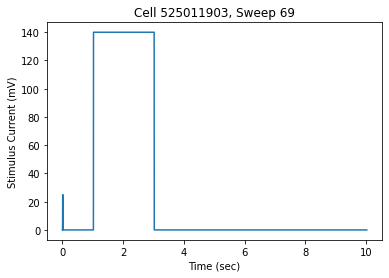

In [30]:
plt.plot(timestamps, stim_current)
plt.ylabel('Stimulus Current (mV)')
plt.xlabel('Time (sec)')
plt.title('Cell 525011903, Sweep 69')

plt.show()